### Compute structure factor for $N=100$

$$ I(k) = \sum_{i=0}^N \sum_{j=0}^N \left\langle \frac{\sin{k ||\vec{R}_i - \vec{R}_j||}}{k ||\vec{R}_i - \vec{R}_j||} \right\rangle$$

In [3]:
# Library for reading simulation data
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b=3.0
N=100
T=10

# Coordinates arrays
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

# Read simulation data
filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
with open(filename,'r') as f:
    for t in range(T):
        # First 2 lines unnecessary
        lines = f.readline()
        lines = f.readline()
        # Save coordinates and separate in x, y, z
        for i in range(N+1):
            lines = f.readline()
            coord = lines.split()
            x[t,i]=float(coord[1])
            y[t,i]=float(coord[2])
            z[t,i]=float(coord[3])

### Compute distance matrix
$$d_{i j} = ||\vec{R}_i - \vec{R}_j||

In [4]:
n = 100
k = np.arange(0, 0.01001, 0.00001)
I = np.zeros(len(k))
t = 1
Guinier = np.zeros(len(k))

for l in range(len(k)):
    Rcm = [np.mean(x[0, :n]), np.mean(y[0, :n]), np.mean(z[0, :n])]
    d2 = (x[0, :n] - Rcm[0])**2 + (y[0, :n] - Rcm[1])**2 + (z[0, :n] - Rcm[2])**2
    Rg = np.mean(d2)
    Guinier[l] = ((n+1)**2) * (1 - (((k[l]*Rg)**2)/3))
    for i in range(n):
        for j in range(n):
            if j != i:
                dist = np.abs((x[:t, i]**2 + y[:t, i]**2 + z[:t, i]**2) - (x[:t, j]**2 + y[:t, j]**2 + z[:t, j]**2))
                I[l] += np.mean(np.sinc(k[l] * dist))
            else:
                I[l] += 1

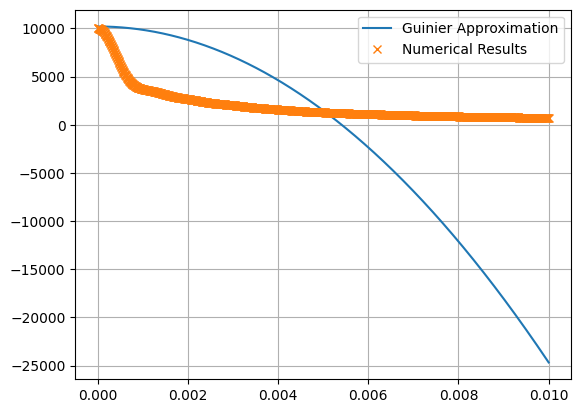

3.0000039685701294

In [5]:
scatfig = plt.figure()
plt.plot(k, Guinier)
plt.grid(True)
plt.plot(k, I, 'x')
plt.legend(['Guinier Approximation', 'Numerical Results'])
plt.show()

t = 1
diff = np.zeros(N-1)
for i in range(N-1):
    xdiff = x[t, i] - x[t, i+1]
    ydiff = y[t, i] - y[t, i+1]
    zdiff = z[t, i] - z[t, i+1]
    diff[i] = np.sqrt(xdiff**2 + ydiff**2 + zdiff**2)
np.mean(diff)

## Structure factor

$$ I(k) = \sum_{i=0}^N \sum_{j=0}^N \left\langle \frac{\sin{k ||\vec{R}_i - \vec{R}_j||}}{k ||\vec{R}_i - \vec{R}_j||} \right\rangle$$

### Comparison with Guinier approximation
$$I(k) = (N + 1)^2 \left[1 - \frac{(k R_g)^2}{3} \right]$$